In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('finalday31.csv', parse_dates=['loggingTime(txt)'])
df['loggingTime(txt)'] = df['loggingTime(txt)'].dt.tz_localize(None)
df.set_index('loggingTime(txt)', inplace=True)
print(df.index[:5])
data = df[['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)','gyroRotationX(rad/s)','gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)','motionYaw(rad)','motionRoll(rad)','motionPitch(rad)']]

DatetimeIndex(['2023-10-12 00:07:51.978000', '2023-10-12 00:07:52.077000',
               '2023-10-12 00:07:52.177000', '2023-10-12 00:07:52.281000',
               '2023-10-12 00:07:52.377000'],
              dtype='datetime64[ns]', name='loggingTime(txt)', freq=None)


In [3]:
def df_to_X_y(df, window_size=2):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        window_data = df_as_np[i:i + window_size]
        X.append(window_data)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [4]:
WINDOW_SIZE = 2
X, y = df_to_X_y(data, WINDOW_SIZE)

In [5]:

total_samples = len(X)
train_samples = int(0.7 * total_samples)
val_samples = int(0.15 * total_samples)
test_samples = total_samples - train_samples - val_samples

In [6]:


# Split the data
X_train, y_train = X[:train_samples], y[:train_samples]
X_val, y_val = X[train_samples:train_samples + val_samples], y[train_samples:train_samples + val_samples]
X_test, y_test = X[train_samples + val_samples:], y[train_samples + val_samples:]


In [7]:
# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [8]:


# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

In [9]:
# Reshape the input data for XGBoost
X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_val_2d = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
X_test_2d = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

In [10]:
# Fit the model
xgb_model.fit(X_train_2d, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, ...)

In [11]:

# Make predictions
train_predictions = xgb_model.predict(X_train_2d)
val_predictions = xgb_model.predict(X_val_2d)
test_predictions = xgb_model.predict(X_test_2d)

In [12]:

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, train_predictions)
mae_val = mean_absolute_error(y_val, val_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)


In [13]:
print(f"Train MAE: {mae_train}")
print(f"Validation MAE: {mae_val}")
print(f"Test MAE: {mae_test}")

Train MAE: 0.07270539091982864
Validation MAE: 0.09368410989364868
Test MAE: 0.1416105318589197


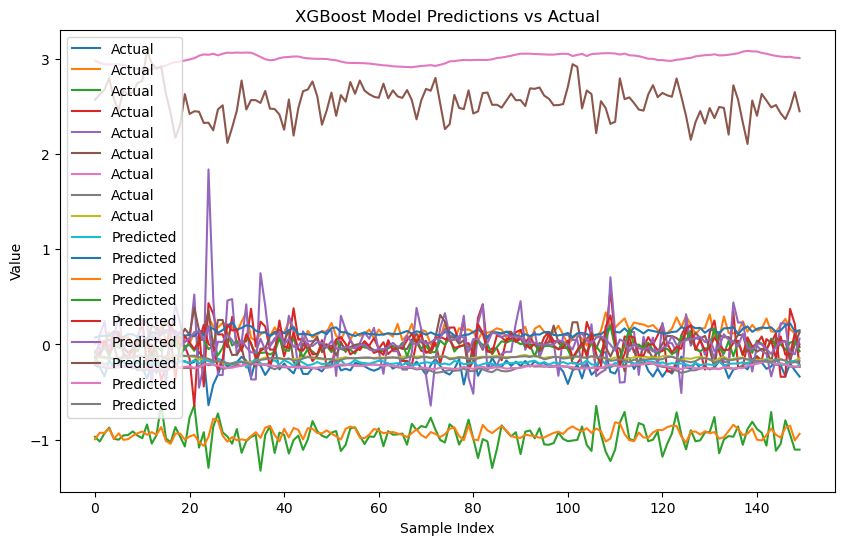

In [14]:

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test[:150], label='Actual')
plt.plot(test_predictions[:150], label='Predicted')
plt.legend()
plt.title('XGBoost Model Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


In [15]:
# Reshaping the input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [16]:

# Initialize the XGBoost model
model = XGBRegressor(n_estimators=1000, random_state=42)

In [17]:

# Fitting the model
model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:

# Predictions
test_predictions = model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], -1))

In [19]:

# Plotting actual vs predicted for each parameter
output_labels = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
                 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)']

num_outputs = test_predictions.shape[1]

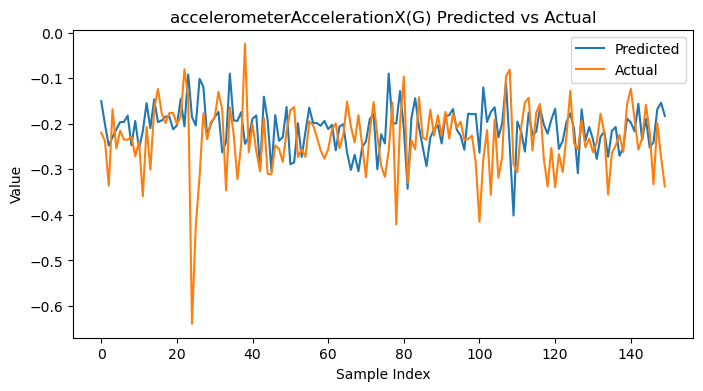

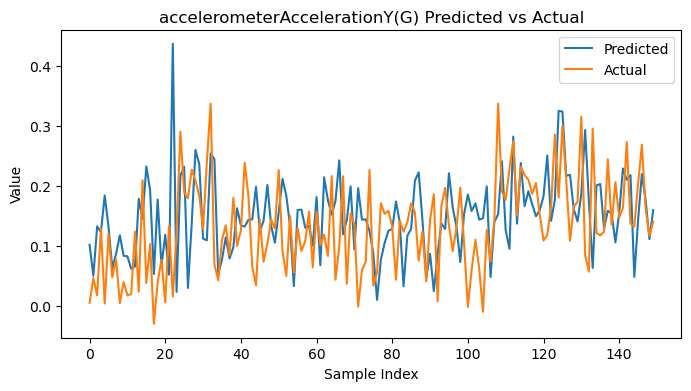

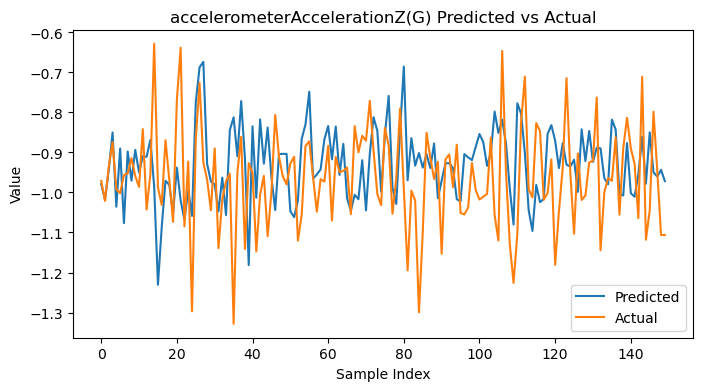

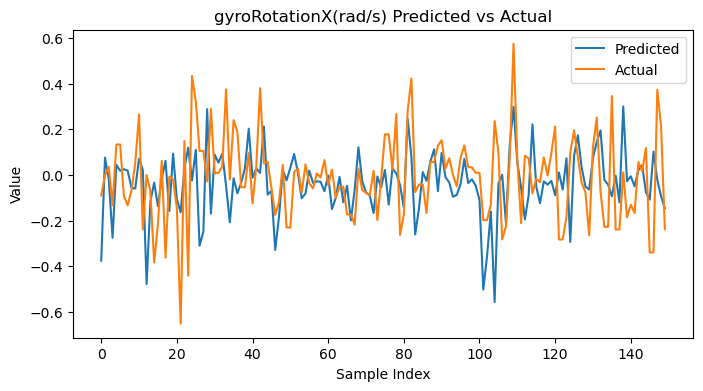

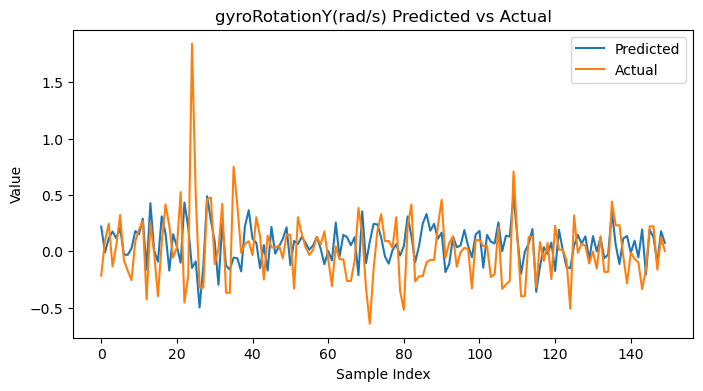

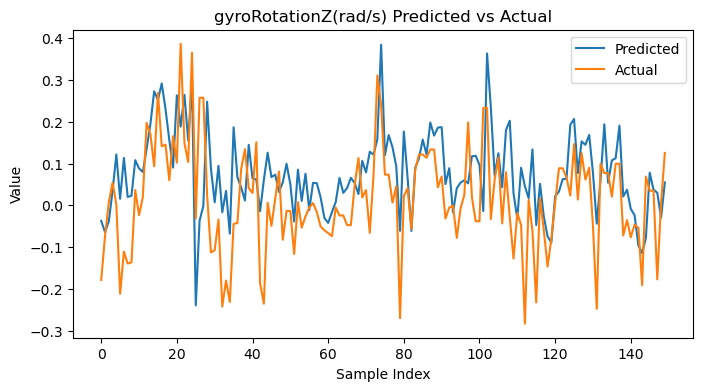

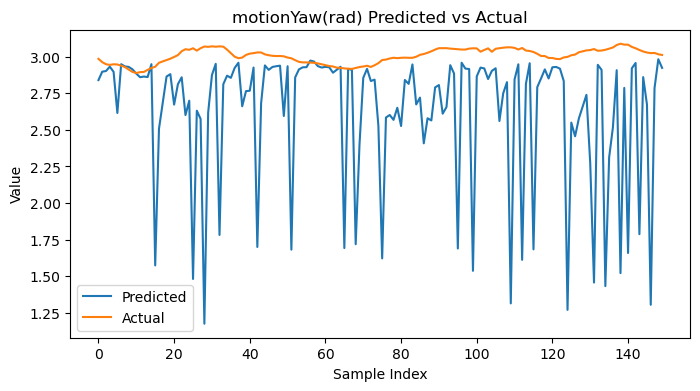

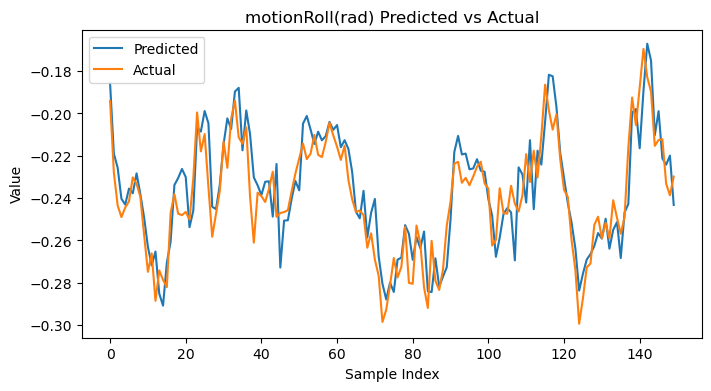

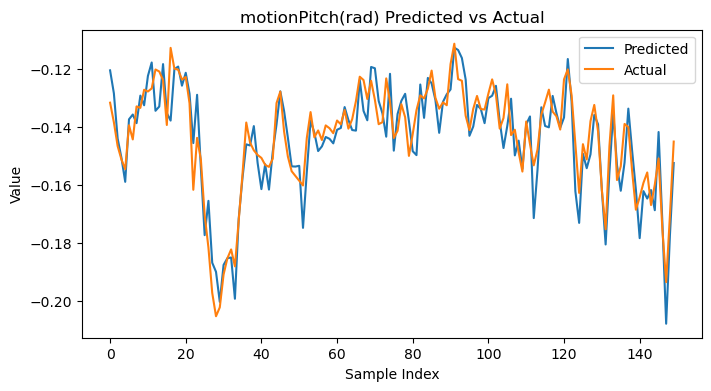

In [20]:

for i in range(num_outputs):
    # Create a DataFrame with predicted and actual values for the current output
    output_data = pd.DataFrame(data={'Predicted': test_predictions[:, i], 'Actual': y_test[:, i]})

    # Plot predicted and actual values
    plt.figure(figsize=(8, 4))
    plt.plot(output_data['Predicted'][:150], label='Predicted')
    plt.plot(output_data['Actual'][:150], label='Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'{output_labels[i]} Predicted vs Actual')
    plt.legend()
    plt.show()


In [21]:
# Calculate residuals for training set
train_residuals = y_train - train_predictions

# Calculate residuals for validation set
val_residuals = y_val - val_predictions

# Calculate residuals for test set
test_residuals = y_test - test_predictions

In [22]:
# Plotting residuals for each output
num_outputs = train_residuals.shape[1]
output_labels = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
                 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)']

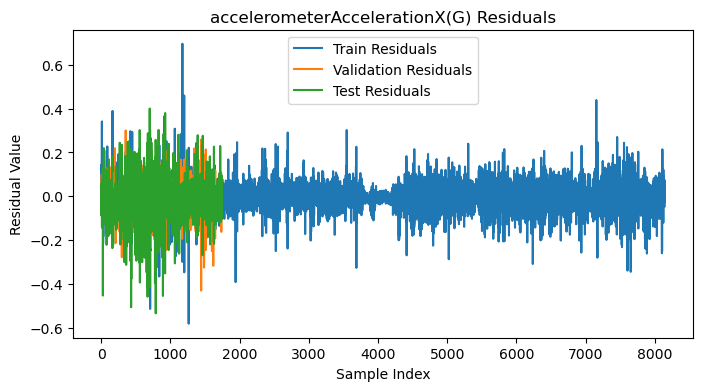

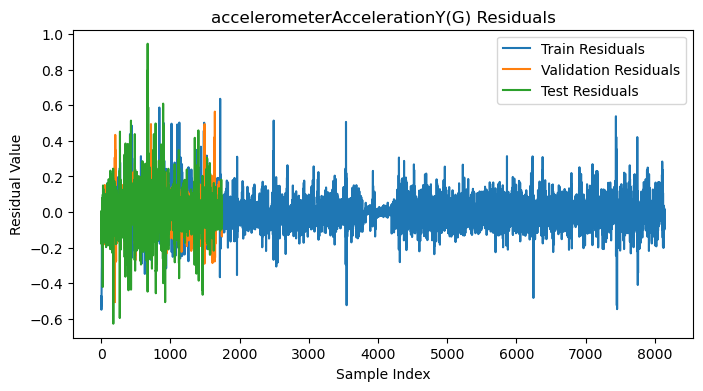

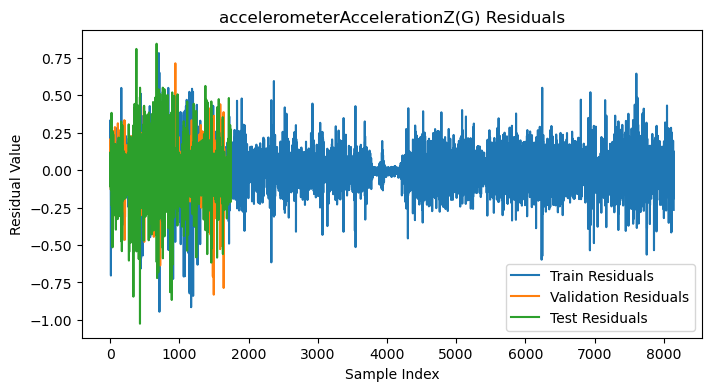

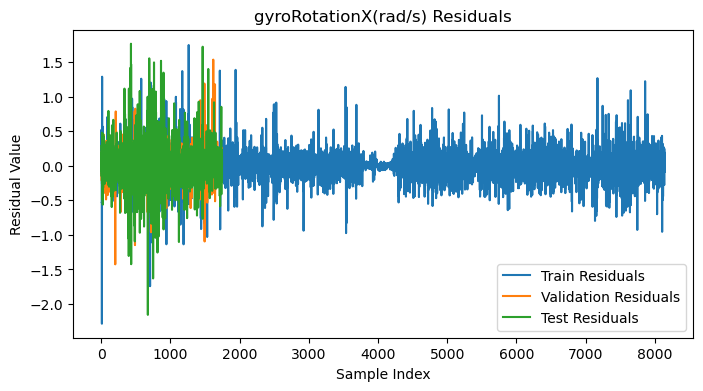

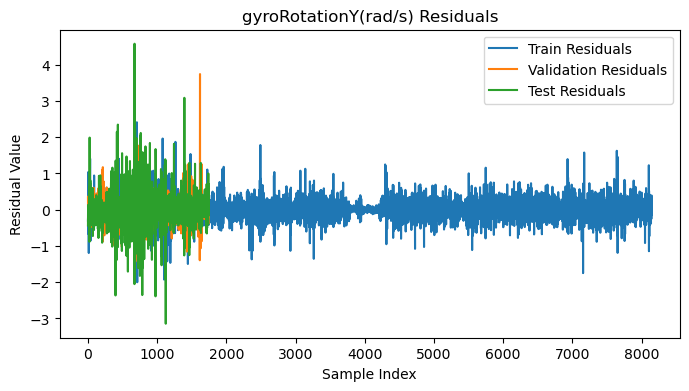

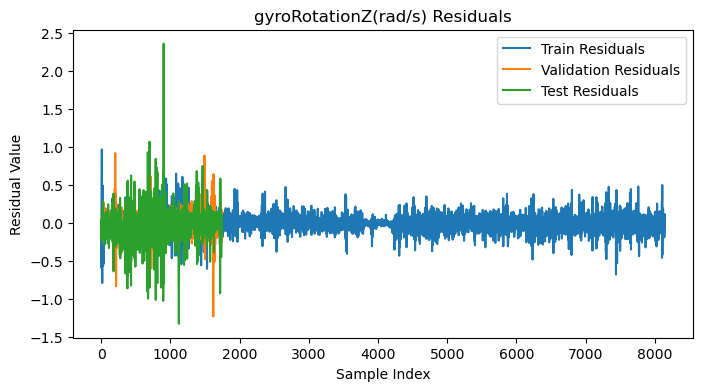

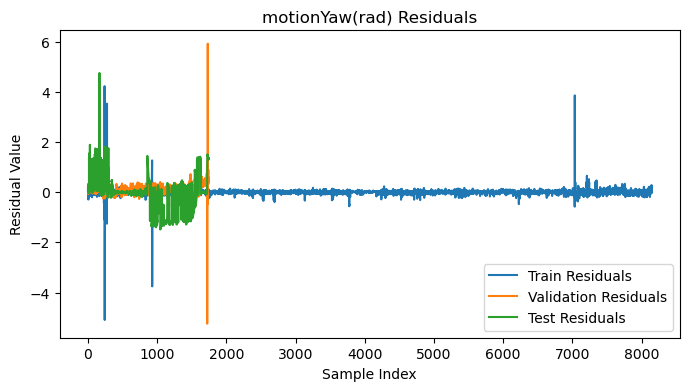

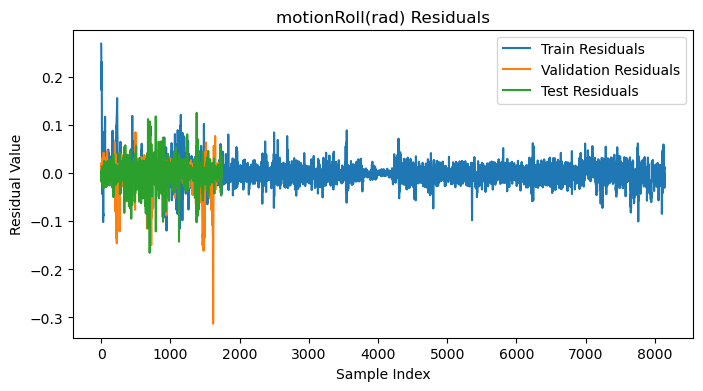

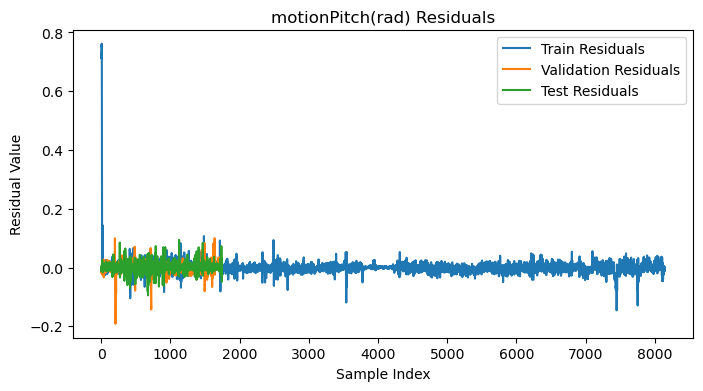

In [23]:

for i in range(num_outputs):
    # Create DataFrames for residuals
    train_res_df = pd.DataFrame(data={'Residuals': train_residuals[:, i]})
    val_res_df = pd.DataFrame(data={'Residuals': val_residuals[:, i]})
    test_res_df = pd.DataFrame(data={'Residuals': test_residuals[:, i]})

    # Plot residuals for each set
    plt.figure(figsize=(8, 4))
    plt.plot(train_res_df['Residuals'], label='Train Residuals')
    plt.plot(val_res_df['Residuals'], label='Validation Residuals')
    plt.plot(test_res_df['Residuals'], label='Test Residuals')
    plt.xlabel('Sample Index')
    plt.ylabel('Residual Value')
    plt.title(f'{output_labels[i]} Residuals')
    plt.legend()
    plt.show()


In [24]:
df1 = pd.read_csv('finalday32.csv', parse_dates=['loggingTime(txt)'])
df1['loggingTime(txt)'] = df1['loggingTime(txt)'].dt.tz_localize(None)
df1.set_index('loggingTime(txt)', inplace=True)
print(df1.index[:5])

DatetimeIndex(['2023-10-12 00:28:13.914000', '2023-10-12 00:28:14.014000',
               '2023-10-12 00:28:14.114000', '2023-10-12 00:28:14.214000',
               '2023-10-12 00:28:14.314000'],
              dtype='datetime64[ns]', name='loggingTime(txt)', freq=None)


In [25]:
data = df1[['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)','gyroRotationX(rad/s)','gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)','motionYaw(rad)','motionRoll(rad)','motionPitch(rad)']]

In [26]:
WINDOW_SIZE = 2
X2, y2 = df_to_X_y(data, WINDOW_SIZE)

In [27]:
# Scaling features
scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2.reshape(-1, X2.shape[-1])).reshape(X2.shape)

In [28]:
# Reshape the input data for MLPRegressor
#X_train_2d = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
#X_val_2d = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
X_2d = X2_scaled.reshape(X2_scaled.shape[0], -1)


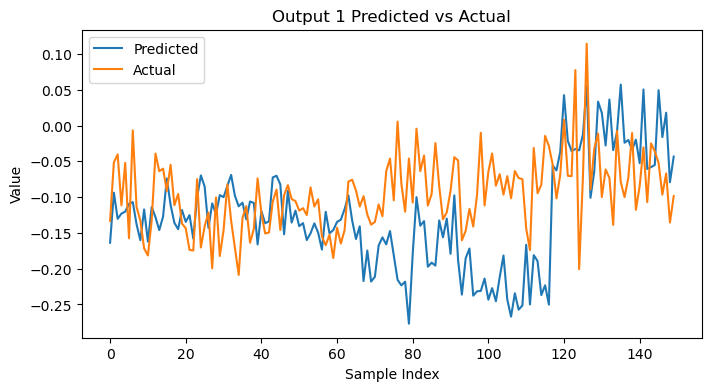

0.10486431025874036


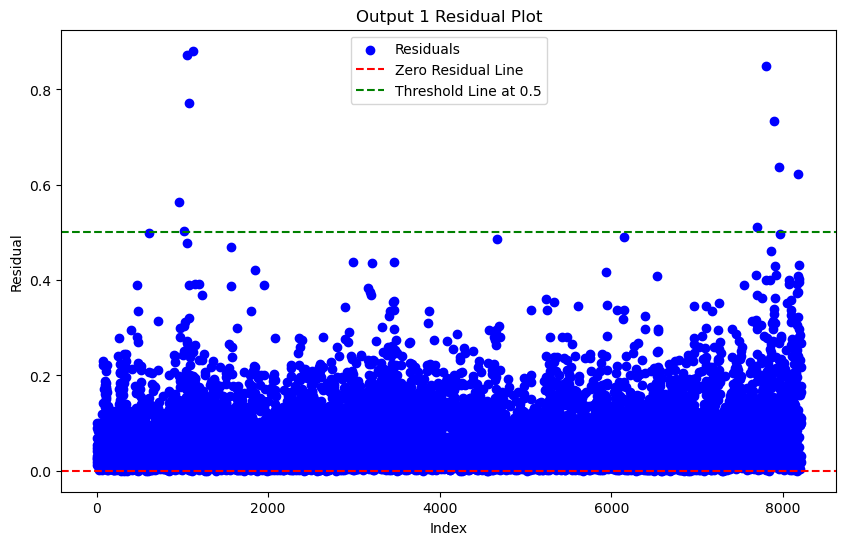

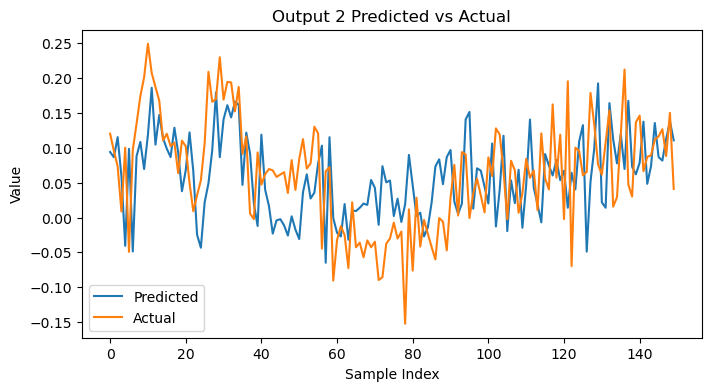

0.13376654901516905


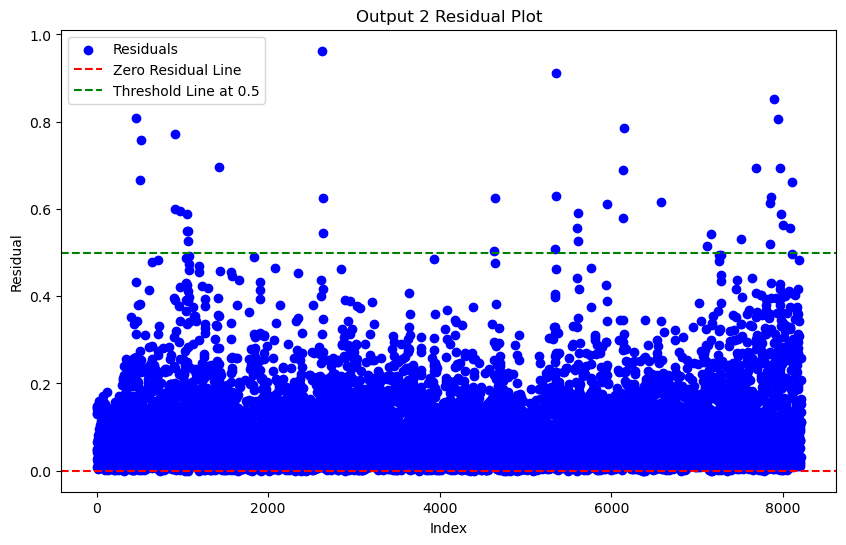

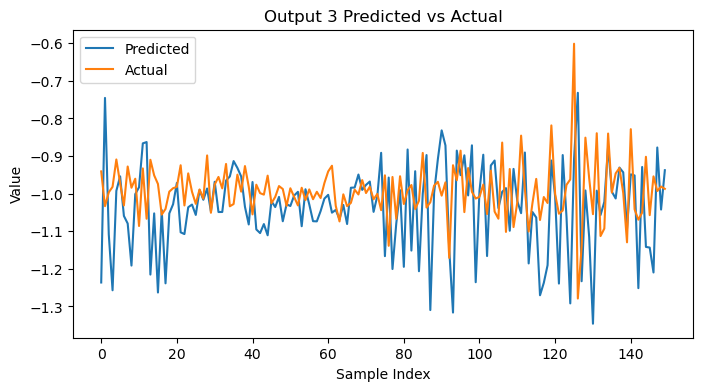

0.22724251093154454


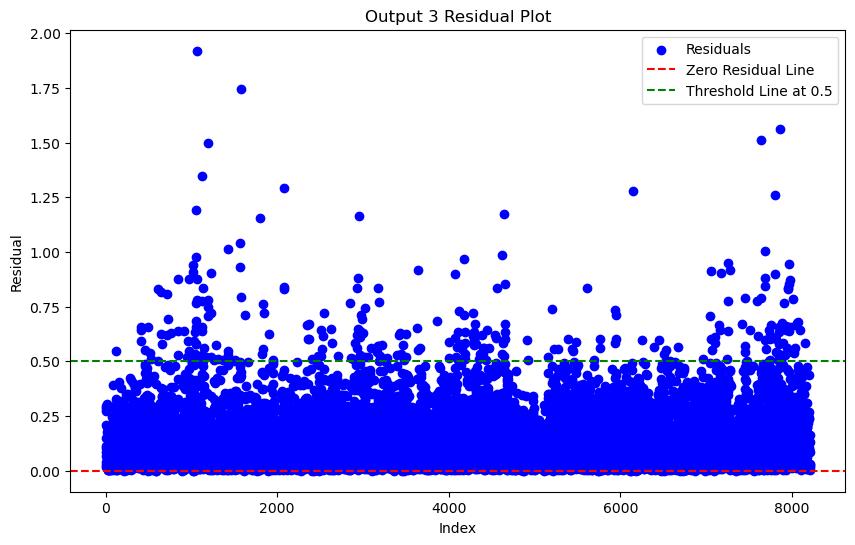

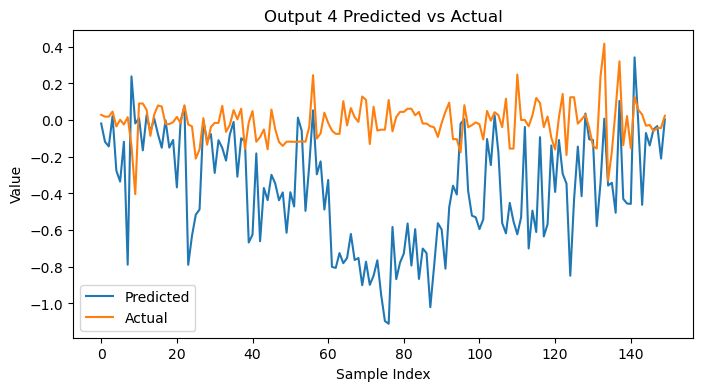

0.4513192003644201


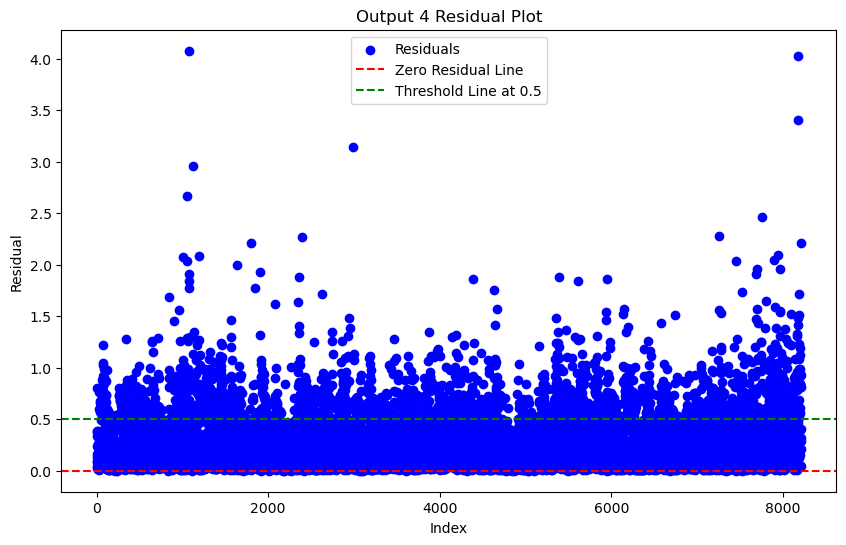

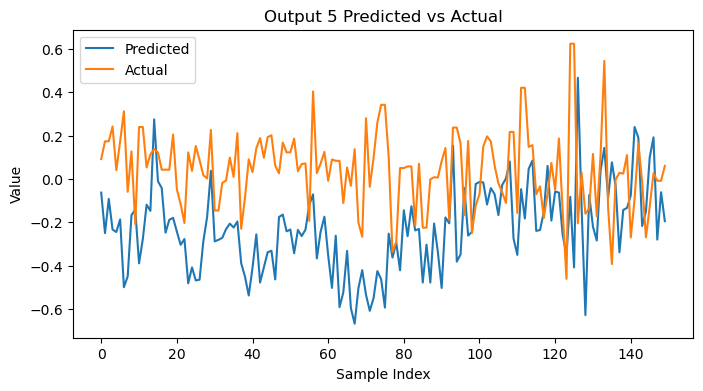

0.48142034208493456


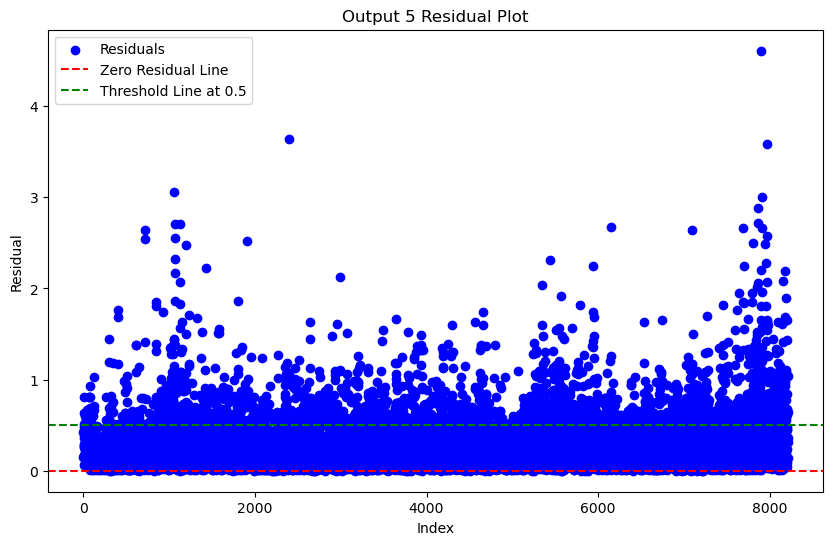

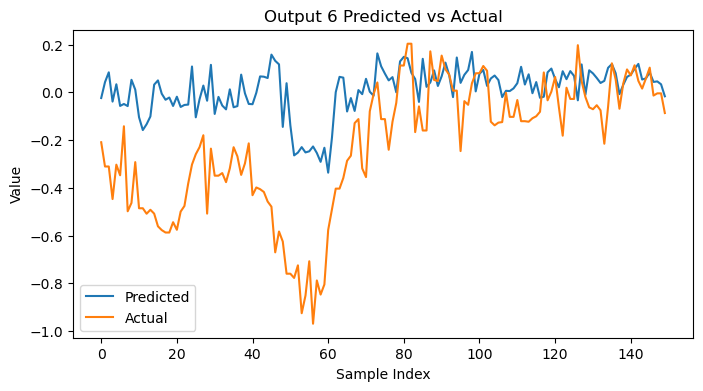

0.2509247597325629


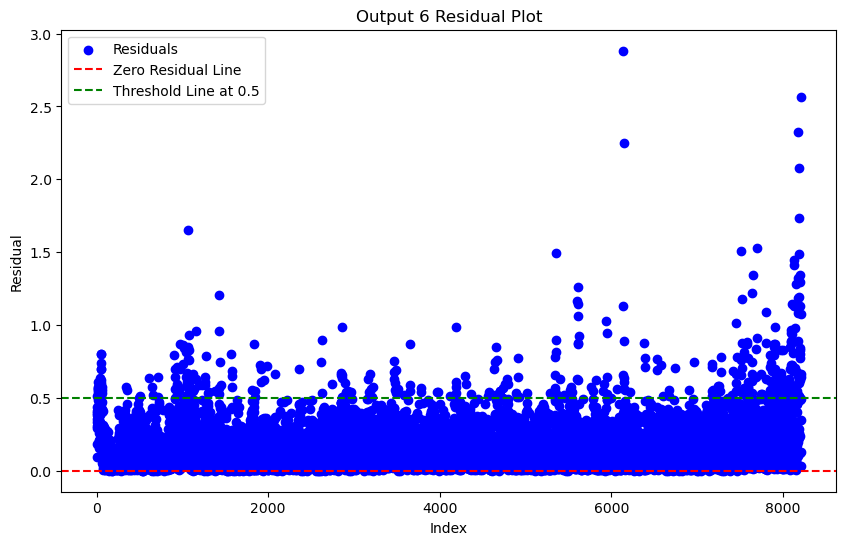

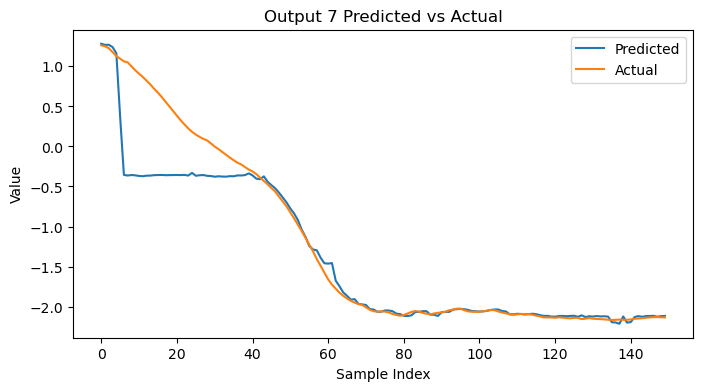

0.5793094612593821


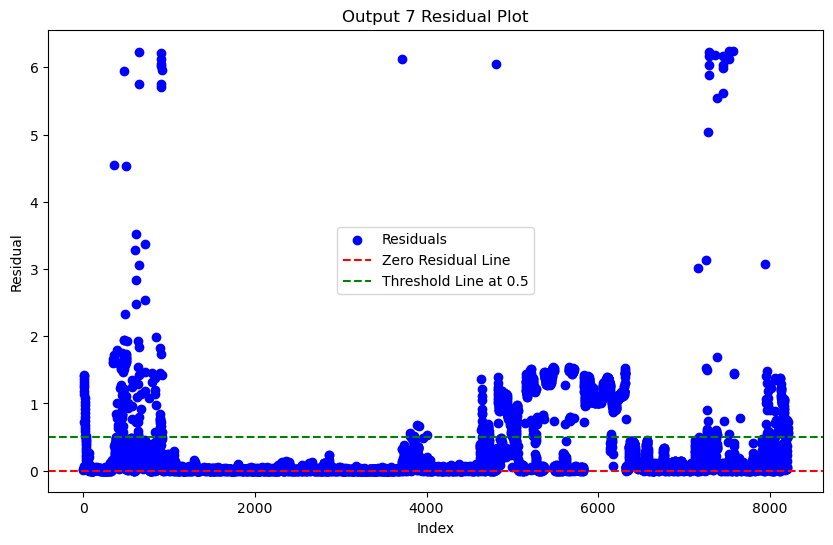

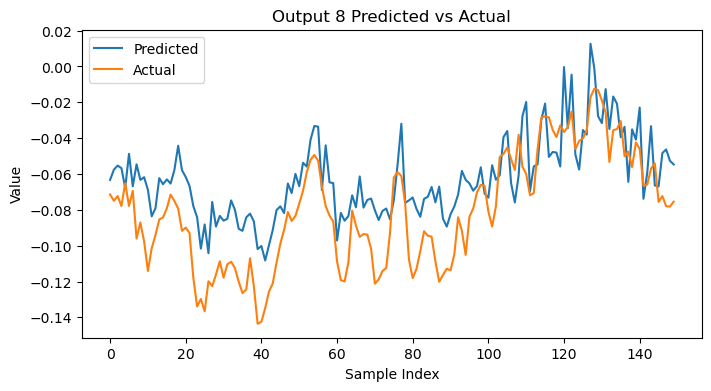

0.0551084632450233


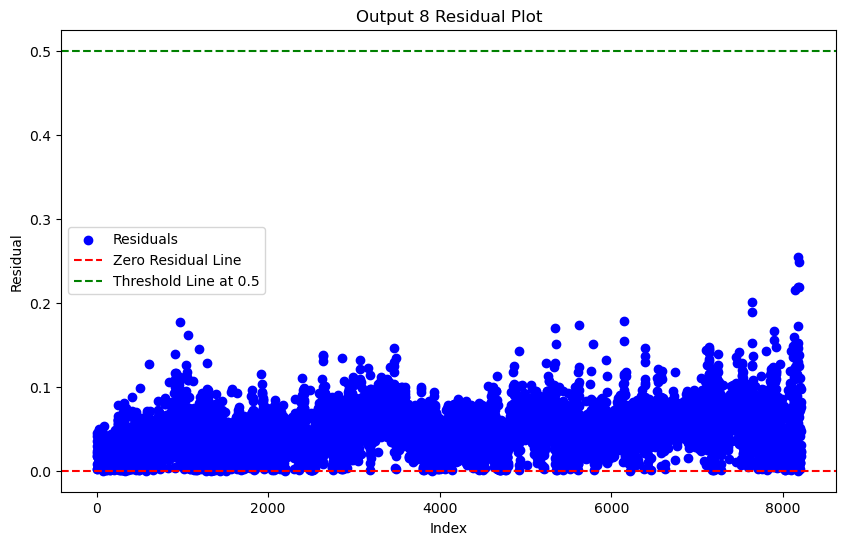

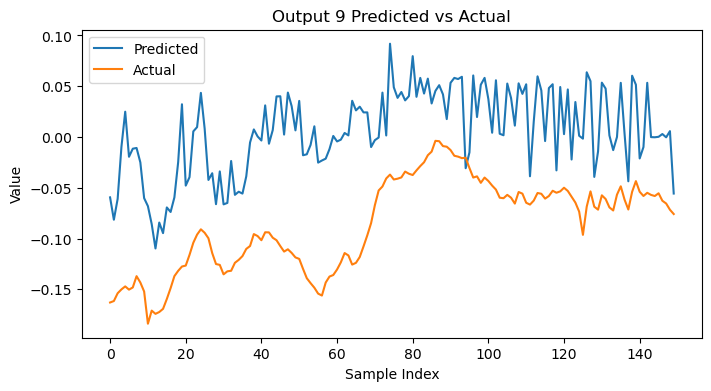

0.09630946522188116


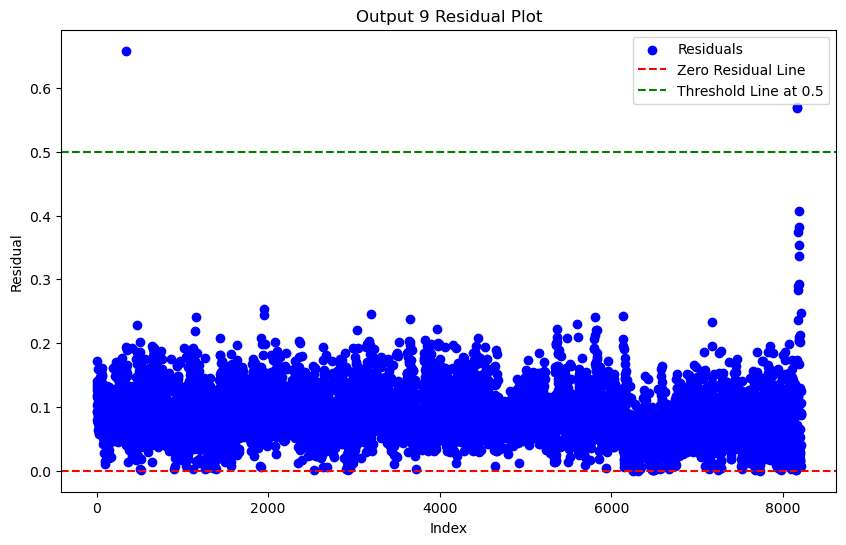

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you already have X2 and y2 defined
test_predictions = model.predict(X_2d)

for i in range(y2.shape[1]):
    # Select the column corresponding to the current output from test_predictions
    predicted_column = test_predictions[:, i]

    # Select the column corresponding to the current output from y2
    actual_column = y2[:, i]

    # Create a DataFrame with predicted and actual values for the current output
    output_data = pd.DataFrame(data={'Predicted': predicted_column.flatten(), 'Actual': actual_column.flatten()})

    # Plot predicted and actual values
    plt.figure(figsize=(8, 4))
    plt.plot(output_data['Predicted'][:150], label='Predicted')
    plt.plot(output_data['Actual'][:150], label='Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Output {i+1} Predicted vs Actual')
    plt.legend()
    plt.show()
    output_data['Residual'] = output_data['Predicted'] - output_data['Actual']
    output_data['RMSE'] = np.sqrt(np.square(output_data['Residual']))
    mse = (output_data['Residual'] ** 2).mean()
    rmse = np.sqrt(mse)
    print(rmse)

    plt.figure(figsize=(10, 6))
    plt.scatter(output_data.index, output_data['RMSE'], color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold Line at 0.5')  # Threshold line at 0.5
    plt.xlabel('Index')
    plt.ylabel('Residual')
    plt.title(f'Output {i+1} Residual Plot')
    plt.legend()
    plt.show()


In [30]:
X_2d.shape

(8213, 18)